## Name: Sankalp Indish
## Class: TE-B
## Batch: B4
## Subject: DSBDAL
## Roll No.: TEB75
## Title: Data Visualization
### Download the Iris flower dataset or any other dataset into a DataFrame. 
### Scan the dataset and give the inference as: 
#### 1. List down the features and their types (e.g., numeric, nominal) available in the dataset. 
#### 2. Create a histogram for each feature in the dataset to illustrate the feature distributions. 
#### 3. Create a boxplot for each feature in the dataset. 
#### 4. Compare distributions and identify outliers.

In [22]:
# Importing the required libraries for the program execution
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# Importing the dataset
df = pd.read_csv("Iris.csv ")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
# Checking information about rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [25]:
# Checking the data types of the columns
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [26]:
# Descriptive statistics
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [27]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

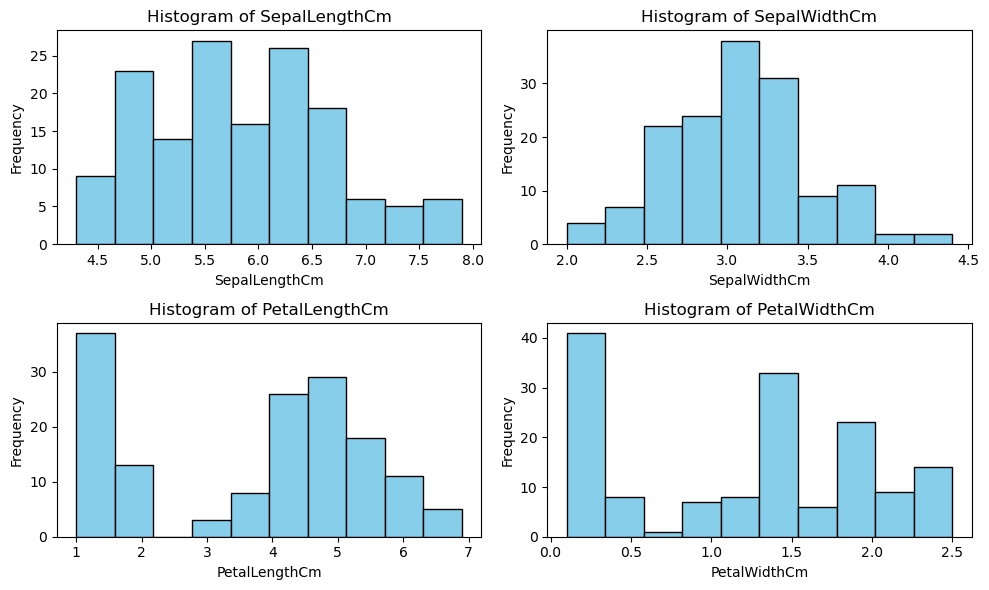

In [30]:
# Filter out the 'Species' column for histogram plotting
numeric_columns = df.select_dtypes(include=['float64']).columns

# Set up the subplot grid
n_cols = 2  # Number of columns for the subplot grid
n_rows = (len(numeric_columns) // n_cols) + (len(numeric_columns) % n_cols > 0)

# Create a figure to hold the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 6))

# Flatten the axes array to easily iterate over it
axes = axes.flatten()

# Loop over the numeric columns and plot each histogram
for i, column in enumerate(numeric_columns):
    axes[i].hist(df[column], bins=10, color='skyblue', edgecolor='black')
    axes[i].set_title(f"Histogram of {column}")
    axes[i].set_xlabel(f"{column}")
    axes[i].set_ylabel("Frequency")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

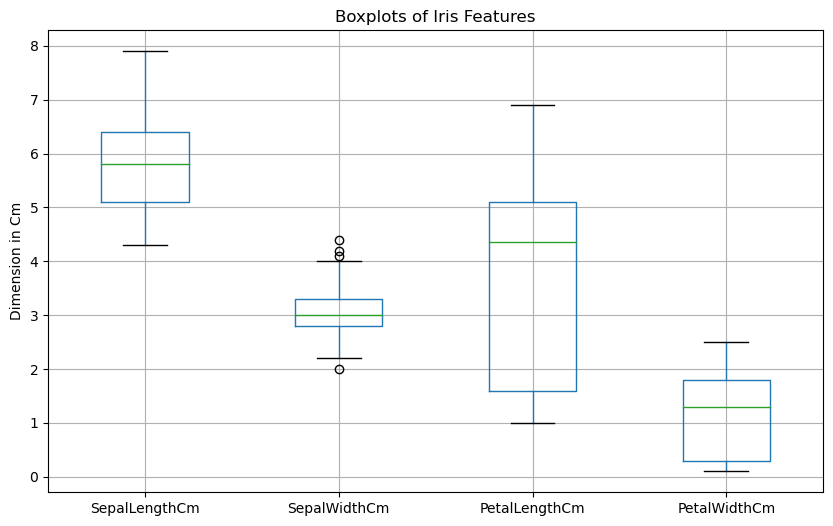

In [31]:
# Create boxplots for SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm
plt.figure(figsize=(10, 6))  
df.boxplot(column=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']) 
plt.title('Boxplots of Iris Features') 
plt.ylabel('Dimension in Cm') 
plt.show()

In [33]:
# We detected outlier in Boxplot of SepalWidthCm Column 
# The boxplot itself visually represents outliers. 
# We can use IQR to programmatically find them.

In [34]:
# Calculate Q1, Q3, and IQR 
Q1 = df['SepalWidthCm'].quantile(0.25) 
Q3 = df['SepalWidthCm'].quantile(0.75) 
IQR = Q3 - Q1

In [35]:
# Define bounds for outliers 
lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR

In [36]:
print(f"Lower Bound: {lower_bound}\nUpper Bound: {upper_bound}")

Lower Bound: 2.05
Upper Bound: 4.05


In [39]:
# Identify outliers 
outliers = df[(df['SepalWidthCm'] < lower_bound) | (df['SepalWidthCm'] > upper_bound)]
print(outliers)

    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
15  16            5.7           4.4            1.5           0.4   
32  33            5.2           4.1            1.5           0.1   
33  34            5.5           4.2            1.4           0.2   
60  61            5.0           2.0            3.5           1.0   

            Species  
15      Iris-setosa  
32      Iris-setosa  
33      Iris-setosa  
60  Iris-versicolor  


In [40]:
# Outliers in SepalWidth
print("Outliers in SepalWidthCm:") 
print(outliers['SepalWidthCm'])

Outliers in SepalWidthCm:
15    4.4
32    4.1
33    4.2
60    2.0
Name: SepalWidthCm, dtype: float64


In [41]:
# Printing the Row Indexes of Outliers 
outlier_indices = outliers.index 
print("Outliers RowIndex:") 
print(outlier_indices)

Outliers RowIndex:
Int64Index([15, 32, 33, 60], dtype='int64')


### Above we complete the Practical's primary objective.
### Below is the process done for further Analyses
### The Iris Flower in the perspective of Biologists, the morphological (structural) differences between the species are to be studied. 
### Below is the extended code (not for exam)

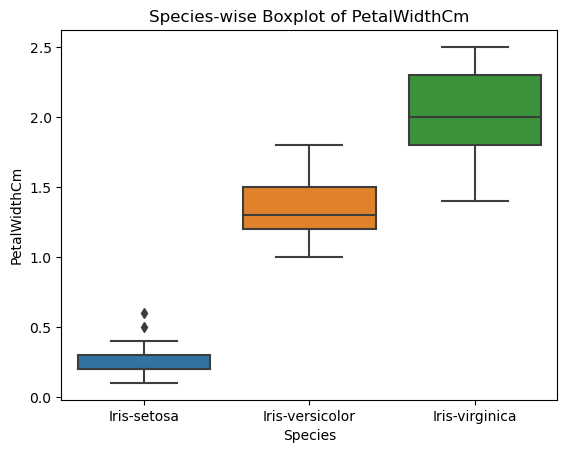

In [42]:
# Lets do a comparitive analysis of all species on PetalWidthCm 
# Draw Specieswise Boxplot for PetalWidthCm 
sns.boxplot(x='Species', y='PetalWidthCm', data=df) 
plt.title('Species-wise Boxplot of PetalWidthCm') 
plt.show()

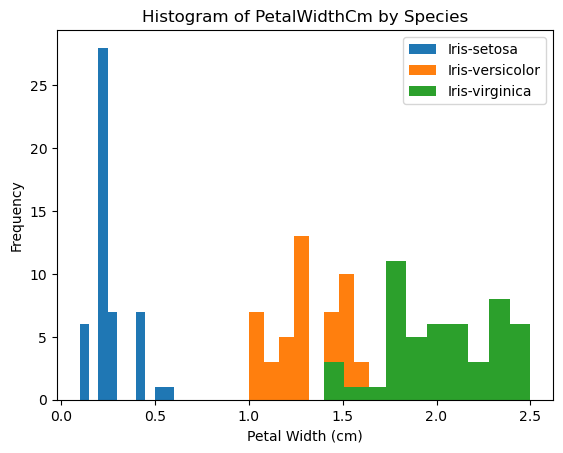

In [45]:
# Create a histogram of PetalWidthCm for each species 
for species in df['Species'].unique(): 
    species_data = df[df['Species'] == species] 
    plt.hist(species_data['PetalWidthCm'], bins=10, label=species)  # Adjust bins as needed 
plt.title('Histogram of PetalWidthCm by Species') 
plt.xlabel('Petal Width (cm)') 
plt.ylabel('Frequency') 
plt.legend() 
plt.show()

In [46]:
# Calculate IQR and identify outliers for each species for PetalWidthCm 
def find_outliers_iqr(data): 
    Q1 = data.quantile(0.25) 
    Q3 = data.quantile(0.75) 
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR 
    outliers = data[(data < lower_bound) | (data > upper_bound)] 
    return outliers
print(f"Lower Bound: {lower_bound}\nUpper Bound: {upper_bound}")

Lower Bound: 2.05
Upper Bound: 4.05


In [49]:
print("Printing Outlier for each species for PetalWidthCm") 
for species in df['Species'].unique(): 
    species_data = df[df['Species'] == species]['PetalWidthCm'] 
    outliers = find_outliers_iqr(species_data) 
    print(f"Outliers for {species}: {outliers.values}")

Printing Outlier for each species for PetalWidthCm
Outliers for Iris-setosa: [0.5 0.6]
Outliers for Iris-versicolor: []
Outliers for Iris-virginica: []


In [50]:
# Return row indices for outliers for Iris-setosa 
def find_outlier_indices(df, species_name, column_name): 
    species_data = df[df['Species'] == species_name][column_name] 
    outliers = find_outliers_iqr(species_data) 
    outlier_indices = outliers.index 
    return outlier_indices

In [51]:
setosa_outlier_indices = find_outlier_indices(df, 'Iris-setosa', 'PetalWidthCm') 
print(f"\nRow indices of outliers for Iris-setosa in 'PetalWidthCm': {setosa_outlier_indices.tolist()}")


Row indices of outliers for Iris-setosa in 'PetalWidthCm': [23, 43]


In [52]:
# Thanks for stopping by. Outliers and understanding as per Biologist completes here